# Trabajo final Econometría
## Estimador de salarios en puestos Tech de EEUU
### Hecho por: Matthew Samuel Horne Negro


# Primeros modelos econométricos

### 1

In [109]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np

Me gusta tener todos los imports juntos por comodidad y no tener que estar repitiendolos o ejeuctando secuencias innecesarias

In [110]:
data = pd.read_csv('Salary_Data.csv')

# Modelo Regresión:  modeldata=stock.values
X = data.values[:, [0, 4]].astype(int)  # Age, Years of Experience
Y = data.values[:, 5].astype(int)  # Salary

results = sm.OLS(Y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     6539.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:56:08   Log-Likelihood:                -77296.
No. Observations:                6582   AIC:                         1.546e+05
Df Residuals:                    6579   BIC:                         1.546e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.89e+04   3462.794     28.559      0.0

**R-squared (R-cuadrado):**

R-squared es una medida de la bondad de ajuste del modelo de regresión. En este caso, el valor es 0.662, lo que significa que aproximadamente el 66.2% de la variabilidad en la variable dependiente (y) puede ser explicada por las variables independientes (x1 y x2) incluidas en el modelo. Un R-cuadrado más alto indica un mejor ajuste del modelo a los datos. Este se alcanzará conforme vayamos haciendo más complejo el modelo e introduzcamos más variables clave como Job Title o Education.

**Adj. R-squared (R-cuadrado ajustado):**

El R-cuadrado ajustado es similar al R-cuadrado, pero tiene en cuenta el número de variables independientes en el modelo. En este caso, el valor es también 0.662, lo que sugiere que el ajuste del modelo es consistente con el número de variables independientes incluidas.

**F-statistic (Estadístico F):**

El estadístico F se utiliza para evaluar la significación conjunta de todas las variables independientes en el modelo. Un valor grande del estadístico F (en este caso, 6556) con un p-valor pequeño (0.00) sugiere que al menos una de las variables independientes es significativa en la explicación de la variabilidad en la variable dependiente.

**Coeficientes:**

Bajo la sección "coef", se observan los coeficientes estimados para las variables en el modelo. En este caso, hay tres coeficientes: uno para la constante (intercepto), otro para x1 y otro para x2. Estos coeficientes indican cuánto cambia la variable dependiente (y) por unidad de cambio en las variables independientes (x1 y x2).
Por ejemplo, el coeficiente para x2 es 9096.3430, lo que significa que, manteniendo todas las demás variables constantes, ceteris paribus, un aumento de una unidad en x2 se asocia con un aumento de aproximadamente 9096.3430 unidades en la variable dependiente (y), es decir, que en este caso por cada 1 año de experiencia más (Years of experience = x2) aumenta 9096.3430$ el salario (Salary = y)

**Estadísticas adicionales:**

Se proporcionan varias estadísticas adicionales, como el estadístico Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis, entre otros. Estas estadísticas pueden ayudar a evaluar suposiciones sobre el modelo y la normalidad de los errores residuales.

<div class="alert alert-info">
    <strong>Nota:</strong> Al usar una base de datos con variables que son de tipo string para este primer modelo solo usaremos
    variables numéricas y que han tenido que ser forzosamente convertidas a int porque si no, genera un error de tipos.
    <br><br>
    Más adelante habrá que convertir las variables categóricas en dummies para el correcto funcionamiento

</div>

### 2

In [111]:
n = 100

X = np.random.normal(0, 10, n)
Y = X + np.random.normal(0, 1, n)

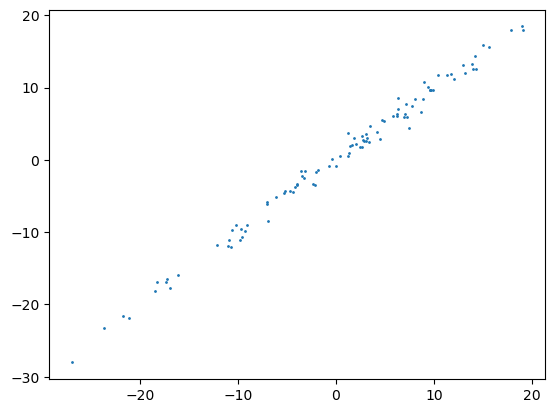

In [112]:
plt.scatter(X, Y, s=1)

plt.show()

In [113]:
results = sm.OLS(Y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.111e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.11e-102
Time:                        17:56:09   Log-Likelihood:                -135.47
No. Observations:                 100   AIC:                             274.9
Df Residuals:                      98   BIC:                             280.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0281      0.095      0.297      0.7

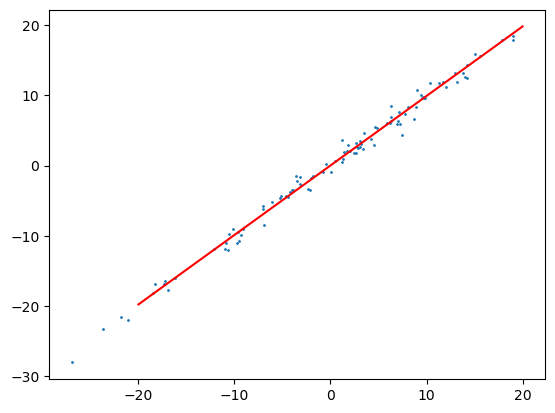

In [114]:
cte = results.params[0]
beta = results.params[1]

plt.plot([-20, 20], [cte + beta * (-20), cte + beta * 20], color='r')
plt.scatter(X, Y, s=1)

plt.show()

El código de los bloques realiza una simulación de datos y ajusta un modelo de regresión lineal a dichos datos.

1. **Generación de Datos:** Se crean dos conjuntos de datos, X e Y, donde X son valores tomados de una distribución normal con una media de 0 y desviación estándar de 10, e Y es una función lineal de X más un término de error aleatorio normalmente distribuido. Esto simula una relación lineal entre X e Y con algo de ruido.

2. **Visualización de Datos:** Se genera un gráfico de dispersión utilizando matplotlib para visualizar la relación entre X e Y. Cada punto representa una observación del conjunto de datos simulado.

3. **Ajuste de Modelo de Regresión:** Se ajusta un modelo de regresión lineal ordinaria de mínimos cuadrados utilizando statsmodels con Y como variable dependiente y X como independiente. Se añade una constante al modelo para incluir un término de intercepto. Se imprime un resumen del modelo que proporciona detalles estadísticos del ajuste.

4. **Visualización del Modelo de Regresión:** Se extraen el intercepto y la pendiente (coeficientes) del modelo ajustado y se utiliza para dibujar la línea de regresión sobre el gráfico de dispersión existente. La línea roja representa la relación estimada entre X e Y según el modelo de regresión.

---

# Estimación e Inferencia en Modelos de Regresión Lineales

## Modelo 1

In [115]:
# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
df = pd.read_csv('Salary_Data.csv')

# Muestra información general sobre el DataFrame, como el tipo de datos y los valores no nulos
#print(df.info())

# Muestra estadísticas descriptivas de las variables numéricas
print(df.describe())

               Age  Years of Experience         Salary
count  6582.000000          6582.000000    6582.000000
mean     33.570799             8.071711  115768.665755
std       7.606075             6.042927   52677.912125
min      21.000000             0.000000   25000.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


1. **Count (Conteo):** Muestra el número total de entradas (no nulas) para cada variable.
    - En este caso, hay 6695 entradas para cada una de las variables: Age (Edad), Years of Experience (Años de Experiencia) y Salary (Salario).

2. **Mean (Media):** Es el promedio de los valores para cada variable.
    - La edad promedio es aproximadamente 33.63 años.
    - Los años de experiencia promedio son aproximadamente 8.10 años.
    - El salario promedio es de aproximadamente 115,395.57 unidades monetarias ($).

3. **Std (Desviación Estándar):** Mide la cantidad de variación o dispersión de un conjunto de valores.
    - La desviación estándar de la edad es aproximadamente 7.62 años, lo que indica la variabilidad de la edad en el conjunto de datos.
    - La desviación estándar de los años de experiencia es de aproximadamente 6.06 años.
    - La desviación estándar del salario es de aproximadamente 52,727.24, indicando la variabilidad en los salarios.

4. **Min (Mínimo):** Es el valor más bajo en cada columna.
    - La edad mínima es de 21 años.
    - El mínimo de años de experiencia es 0 (personas sin experiencia previa).
    - El salario mínimo es de 25,000.

5. **25% (Percentil 25):** Este es el valor por debajo del cual se encuentra el 25% de los datos.
    - 25% de los empleados tienen 28 años o menos.
    - 25% tienen 3 años o menos de experiencia.
    - 25% ganan 70,000 o menos.

6. **50% (Mediana o Percentil 50):** Es el valor medio, donde la mitad de los datos está por debajo de este valor y la otra mitad por encima.
    - La mediana de la edad es de 32 años.
    - La mediana de los años de experiencia es de 7 años.
    - La mediana del salario es de 115,000.

7. **75% (Percentil 75):** El valor por debajo del cual se encuentra el 75% de los datos.
    - 75% de los empleados tienen 38 años o menos.
    - 75% tienen 12 años o menos de experiencia.
    - 75% ganan 160,000 o menos.

8. **Max (Máximo):** Es el valor más alto en cada columna.
    - La edad máxima es de 62 años.
    - El máximo de años de experiencia es de 34 años.
    - El salario máximo es de 250,000.

In [128]:
datos = pd.read_csv('Salary_Data.csv')
datos = pd.get_dummies(datos, columns=['Education Level', 'Job Title', 'Gender'], dtype=int)

display(datos)

,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Back end Developer,Job Title_Content Marketing Manager,Job Title_Customer Service Representative,...,Job Title_Senior UX Designer,Job Title_Social Media Manager,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Project Manager,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other
0,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,46,18,155795,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,10,155000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,25,2,69032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6578,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6579,23,2,62852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6580,31,8,104127,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-info">
    <strong>Nota:</strong> He estado horas atascado creando las dummies, al crear los dummies por defecto los tipos se establecen a TRUE o FALSE, sin embargo nosotros solo trabajamos con números así que, después de horas averigué que solo había que castearlo a tipo int (dtype=int).

</div>

In [136]:
y = datos['Salary']

# Definir 'X' incluyendo todas las columnas de 'Education Level_*' y 'Years of Experience'
# Filtrar las columnas que comienzan con 'Education Level_'
education_columns = [col for col in datos if col.startswith('Education Level_')]
job_columns = [col for col in datos if col.startswith('Job Title_')]
gender_columns = [col for col in datos if col.startswith('Gender_')]

X = sm.add_constant(datos[education_columns + ['Years of Experience'] + job_columns + ['Age'] + gender_columns])

## Estadísticos Descriptivos:

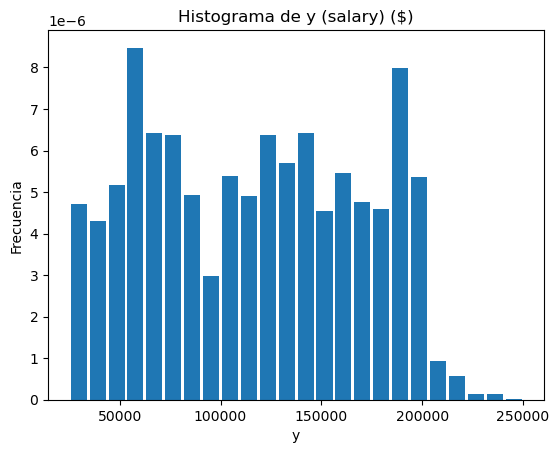

Q1:  70000.0 ($) Mediana: 115000.0 ($) Q3:  160000.0 ($) DT:  52673.91030849146 ($) Media: 115768.66575508963 ($)


In [124]:
media = np.mean(y)
Q1 = np.quantile(y, 0.25)
Q3 = np.quantile(y, 0.75)
DesviacionTipica = np.std(y)
Mediana = np.median(y)
histograma = plt.hist(y, bins='auto', rwidth=0.85, density=True)
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.title("Histograma de y (salary) ($)")
plt.show()
print("Q1: ", Q1, "($) Mediana:", Mediana, "($) Q3: ", Q3, "($) DT: ", DesviacionTipica, "($) Media:", np.mean(y),
      "($)")

1. Media: 115,395.57
2. Primer Cuartil (Q1): 70,000.00
3. Tercer Cuartil (Q3): 160,000.00
4. Desviación Estándar: 52,723.3
5. Mediana: 115,000.00

In [137]:
#np.asarray(education_columns)
mco1 = sm.OLS(y, X).fit()
print(mco1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     328.4
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:06:00   Log-Likelihood:                -74882.
No. Observations:                6582   AIC:                         1.500e+05
Df Residuals:                    6478   BIC:                         1.507e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Como vemos ya se nos está avisando de que puede haber problemas con la multicolinealidad, intentaremos solucionarlo más adelante cuando llegue el momento quizás con una depuración manual de los datos